In [109]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
rng = np.random.default_rng()
pd.set_option('mode.copy_on_write', True)
plt.style.use('fivethirtyeight')

# read the data
df = pd.read_excel('2c Data.xlsx')

# check the data
df.head()

# hard variables
whitehchapelCapacity = 62000
bikeLaneCapacity = 12000
busLaneCapacity = 5000
pedestrianCapacity = 15000
carLaneCapacity = 1500
tramLaneCapacity = 18000

In [110]:
# split the data into 2 sets, one where the ID2 column contains the string OUT and the other where it does not
df_out = df[df['ID2'].str.contains('OUT')]
df_lis = df[~df['ID2'].str.contains('OUT')]

# further split the data into 4 sets, based on if the column health contains the string Yes or No
df_out_yes = df_out[df_out['health'].str.contains('Yes')]
df_out_no = df_out[df_out['health'].str.contains('No')]
df_lis_yes = df_lis[df_lis['health'].str.contains('Yes')]
df_lis_no = df_lis[df_lis['health'].str.contains('No')]


/Users/tomfox/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


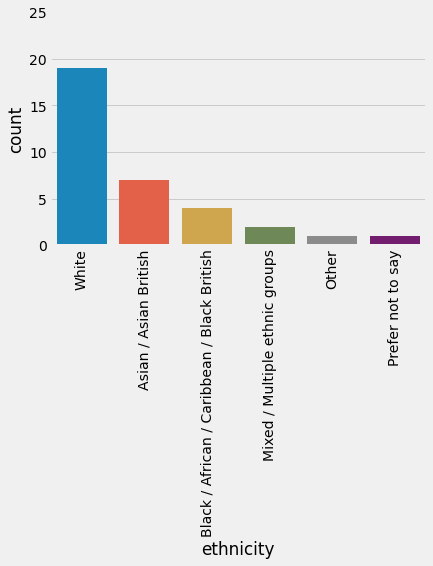

In [111]:
sns.countplot(df.iloc[:, 11], order = df.iloc[:, 11].value_counts().index)
plt.xticks(rotation = 90)
plt.ylim(0, 25)
plt.show()

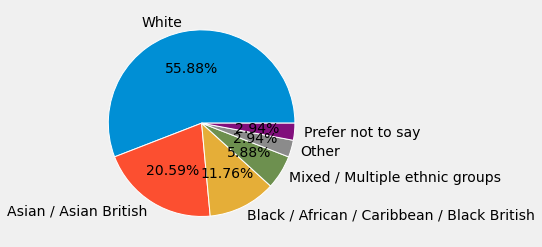

In [48]:
# make a pie chart of the 8th column, give it a white background
plt.pie(df.iloc[:, 11].value_counts(), labels = df.iloc[:, 11].value_counts().index, autopct = '%.2f%%', textprops = {'color': 'black'}, wedgeprops = {'linewidth': 1, 'edgecolor': 'white'})
plt.show()

In [49]:
df.iloc[:, 11].value_counts() / len(df.iloc[:, 11]) * 100

White                                          55.882353
Asian / Asian British                          20.588235
Black / African / Caribbean / Black British    11.764706
Mixed / Multiple ethnic groups                  5.882353
Other                                           2.941176
Prefer not to say                               2.941176
Name: ethnicity, dtype: float64

## Comparative analysis of outside of LIS groups vs inside LIS groups

In [50]:
# print the mean and median of the capacity column for each of the 4 groups
print('Mean of capacity for OUT Yes: ', df_out_yes['capacity'].mean())
print('Median of capacity for OUT Yes: ', df_out_yes['capacity'].median())
print("\n")
print('Mean of capacity for OUT No: ', df_out_no['capacity'].mean())
print('Median of capacity for OUT No: ', df_out_no['capacity'].median())
print("\n")
print('Mean of capacity for LIS Yes: ', df_lis_yes['capacity'].mean())
print('Median of capacity for LIS Yes: ', df_lis_yes['capacity'].median())
print("\n")
print('Mean of capacity for LIS No: ', df_lis_no['capacity'].mean())
print('Median of capacity for LIS No: ', df_lis_no['capacity'].median())
print("\n")

# print the mean and median of the capacity column for the df_out and df_lis dataframes
print('Mean of capacity for OUT: ', df_out['capacity'].mean())
print('Median of capacity for OUT: ', df_out['capacity'].median())
print('Mean of capacity for LIS: ', df_lis['capacity'].mean())
print('Median of capacity for LIS: ', df_lis['capacity'].median())
print("\n")
# print the mean and median of the capacity column for the whole dataframe
print('Mean of capacity for whole dataframe: ', df['capacity'].mean())
print('Median of capacity for whole dataframe: ', df['capacity'].median())


Mean of capacity for OUT Yes:  61500.0
Median of capacity for OUT Yes:  62000.0


Mean of capacity for OUT No:  66714.28571428571
Median of capacity for OUT No:  63000.0


Mean of capacity for LIS Yes:  78900.0
Median of capacity for LIS Yes:  73500.0


Mean of capacity for LIS No:  70900.0
Median of capacity for LIS No:  67000.0


Mean of capacity for OUT:  64107.142857142855
Median of capacity for OUT:  62500.0
Mean of capacity for LIS:  74900.0
Median of capacity for LIS:  70000.0


Mean of capacity for whole dataframe:  70455.88235294117
Median of capacity for whole dataframe:  66500.0


<AxesSubplot:xlabel='capacity', ylabel='group'>

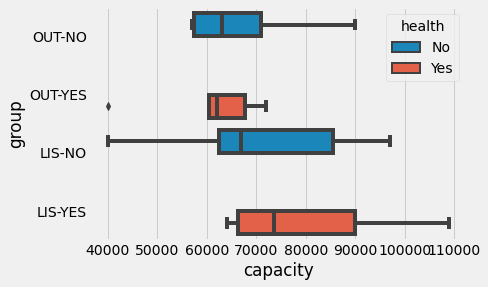

In [51]:
# box plot of the capacity column for each of the 4 groups
sns.boxplot(data=df, x="capacity", y="group", hue="health")

<AxesSubplot:xlabel='capacity', ylabel='group'>

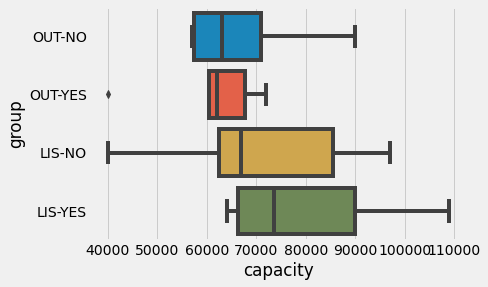

In [52]:
# box plot of the capacity column for each of the 4 groups
sns.boxplot(data=df, x="capacity", y="group")

<AxesSubplot:xlabel='Trees number', ylabel='group'>

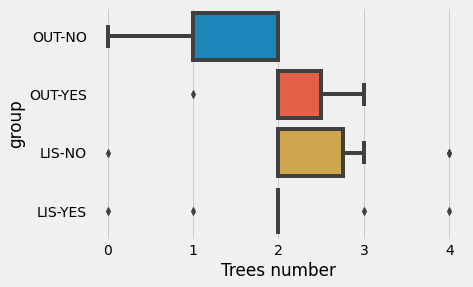

In [53]:
# box plot of the Trees number column for each of the 4 groups
sns.boxplot(data=df, x="Trees number", y="group")

<AxesSubplot:xlabel='Total veg number', ylabel='group'>

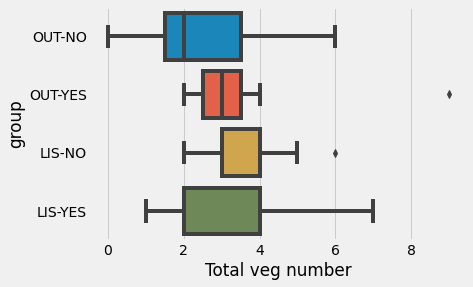

In [54]:
# add the Trees number column and the Other veg number column together
df['Total veg number'] = df['Trees number'] + df['Other veg number']

# box plot of the Total veg number column for each of the 4 groups
sns.boxplot(data=df, x="Total veg number", y="group")

<AxesSubplot:xlabel='Bike lane number (or scooter)', ylabel='group'>

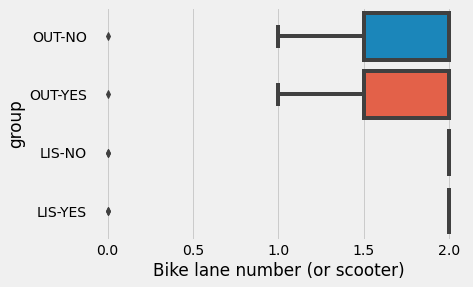

In [55]:
# box plot of the Bike lane number (or scooter) column for each of the 4 groups
sns.boxplot(data=df, x="Bike lane number (or scooter)", y="group")

<AxesSubplot:xlabel='Bike lane number (or scooter)', ylabel='group'>

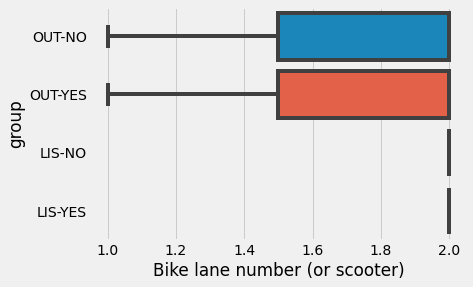

In [56]:
# box plot of the Bike lane number (or scooter) column for each of the 4 groups, excluding outliers
sns.boxplot(data=df, x="Bike lane number (or scooter)", y="group", showfliers=False)

<AxesSubplot:xlabel='Bike lane width', ylabel='group'>

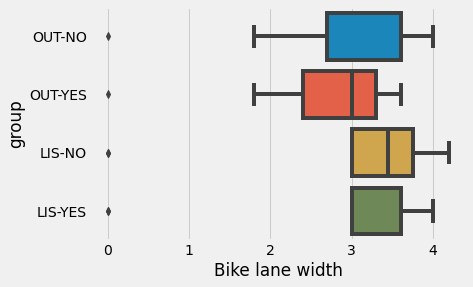

In [57]:
# box plot of the Bike lane width column for each of the 4 groups
sns.boxplot(data=df, x="Bike lane width", y="group")

<AxesSubplot:xlabel='Bike lane width', ylabel='group'>

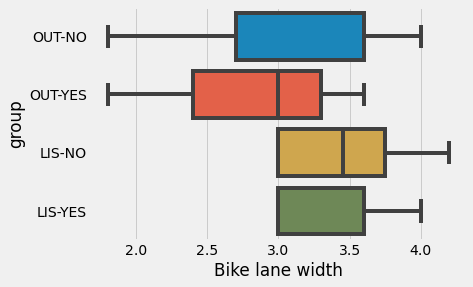

In [58]:
# box plot of the Bike lane width column for each of the 4 groups, excluding the outliers
sns.boxplot(data=df, x="Bike lane width", y="group", showfliers = False)

# Permutation

In [90]:
lis_capacity = np.array(df_lis['capacity'])
out_capacity = np.array(df_out['capacity'])

n_lis = len(lis_capacity)
n_out = len(out_capacity)

In [79]:
pooled = np.concatenate([lis_capacity, out_capacity])
pooled

array([ 93000,  75000,  62000,  67000,  57000, 109000,  97000,  64000,
        90000,  72000,  64000,  90000,  72000,  66000,  40000,  90000,
        68000,  66000,  66000,  90000,  57000,  64000,  90000,  60500,
        67000,  40000,  58000,  62000,  75000,  72000,  57000,  60500,
        63000,  71500])

In [80]:
shuffled = rng.permutation(pooled)
shuffled

array([ 93000,  68000,  90000,  64000,  67000,  57000,  63000,  72000,
        75000,  62000,  58000,  66000,  72000,  64000,  40000,  57000,
        60500,  64000,  40000,  66000,  72000,  90000,  90000,  97000,
        57000,  67000, 109000,  71500,  66000,  75000,  90000,  60500,
        90000,  62000])

In [82]:
# The first 774 values
fake_lis = shuffled[:20]
# The rest
fake_out = shuffled[20:]
len(fake_out)

14

In [85]:
real_difference = np.mean(lis_capacity) - np.mean(out_capacity)
real_difference

10792.857142857145

In [84]:
fake_difference = np.mean(fake_lis) - np.mean(fake_out)
fake_difference

-13432.142857142855

In [86]:
shuffled = rng.permutation(pooled)
fake_difference_2 = np.mean(shuffled[:20]) - np.mean(shuffled[20:])
fake_difference_2

-2442.857142857145

In [91]:
# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis]
    fake_out = shuffled[n_out:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    # Collect the results in the results array
    example_diffs[i] = eg_diff

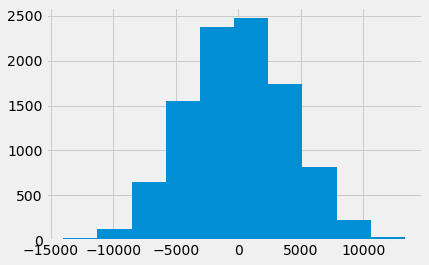

In [92]:
plt.hist(example_diffs);

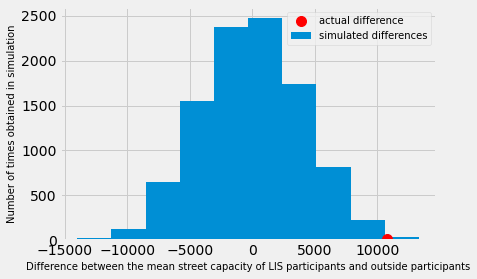

In [95]:
# do not worry about the code below, it just plots the sampling distribution, the actual difference in the mean ages, 
# and adds some labels to the histogram. 
plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

So conclusion is that there is probably a real difference between the two groups because the actual difference is very unlikely in the sample of 10000 simulated differences.

In [96]:
are_as_high = example_diffs >= real_difference
n_as_high = np.count_nonzero(are_as_high)
n_as_high

30

In [97]:
proportion = n_as_high / 10000
proportion

0.003

### Permutation of no vs yes

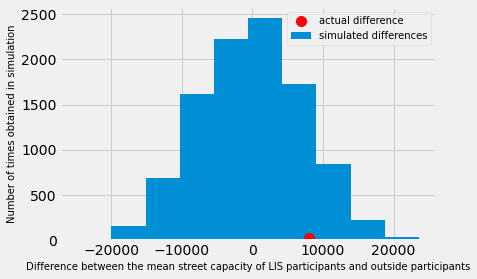

In [105]:
lis_yes_capacity = np.array(df_lis_yes['capacity'])
lis_no_capacity = np.array(df_lis_no['capacity'])

n_lis_yes = len(lis_yes_capacity)
n_lis_no = len(lis_no_capacity)

real_difference = np.mean(lis_yes_capacity) - np.mean(lis_no_capacity)

pooled = np.concatenate([lis_yes_capacity, lis_no_capacity])
shuffled = rng.permutation(pooled)

# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis_yes]
    fake_out = shuffled[n_lis_no:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    # Collect the results in the results array
    example_diffs[i] = eg_diff


# do not worry about the code below, it just plots the sampling distribution, the actual difference in the mean ages, 
# and adds some labels to the histogram. 
plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

In [106]:
are_as_high = example_diffs >= real_difference
n_as_high = np.count_nonzero(are_as_high)
n_as_high

1453

In [107]:
proportion = n_as_high / 10000
proportion

0.1453